In [1]:
import numpy as np
import numpy.ma as ma
import cv2
from matplotlib import pyplot as plt

from skimage import filters

from scipy import ndimage

In [2]:
raw_data_dir = "raw_data/"

In [31]:
def show_color_im(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
def save_color_im(img2):
    plt.imsave("masked_data/8p70_07.png", cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

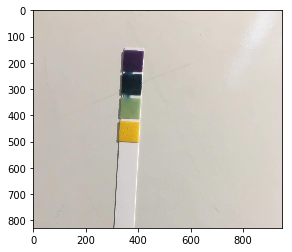

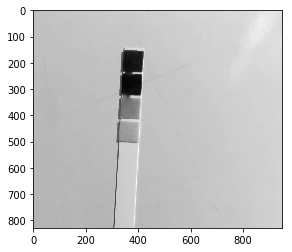

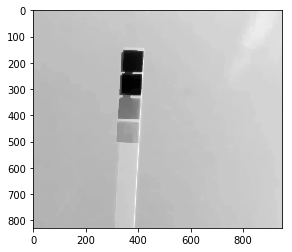

In [34]:
img = cv2.imread(raw_data_dir + '8p70_07.jpg')
img = img[5:-500,25:-25]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
show_color_im(img)
plt.show()

kernel = np.ones((3,3),np.uint8)
init_closed = cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel, iterations = 10)
plt.imshow(gray, cmap='gray')
plt.show()
plt.imshow(init_closed, cmap='gray')
plt.show()

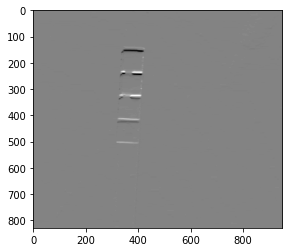

94 557 265 476


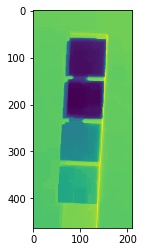

In [37]:
gray = init_closed
sobel_v = filters.sobel_v(gray)
sobel_h = filters.sobel_h(gray)
sobel_v = filters.gaussian(sobel_v, sigma=2.0)
sobel_h = filters.gaussian(sobel_h, sigma=2.0)

plt.imshow(sobel_h, cmap='gray')
plt.show()
mask_v = np.abs(sobel_v) > .03
mask_h = np.abs(sobel_h) > .03
# Coordinates of non-black pixels.
coords_y = np.argwhere(mask_v)
coords_x = np.argwhere(mask_h)

# Bounding box of non-black pixels.
x0 = max(coords_x.min(axis=0)[0] - 50,0)
x1 = coords_x.max(axis=0)[0] + 51
y0 = max(coords_y.min(axis=0)[1] - 50,0)
y1 = coords_y.max(axis=0)[1] + 51
print(x0,x1,y0,y1)

# Get the contents of the bounding box.
cropped_gray = gray[x0:x1, y0:y1]
cropped_img = img[x0:x1, y0:y1]
plt.imshow(cropped_gray)
plt.show()

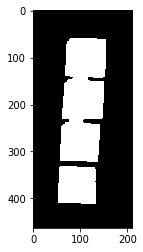

In [38]:
thresh_val = np.median(cropped_gray)/1.05
ret, thresh = cv2.threshold(cropped_gray,thresh_val,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray')
plt.show()

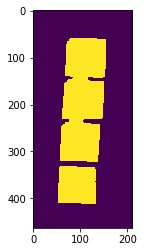

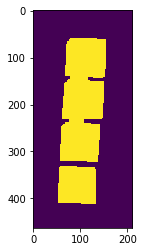

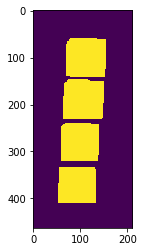

In [39]:
kernel = np.ones((3,3),np.uint8)
plt.imshow(thresh)
plt.show()

closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
plt.imshow(closing)
plt.show()
blobs, num_blobs = ndimage.label(closing)
iters = 5
opening = closing
while num_blobs != 4:
    opening = cv2.morphologyEx(closing,cv2.MORPH_OPEN,kernel, iterations = iters)
    iters += 5
    blobs, num_blobs = ndimage.label(opening)
plt.imshow(opening)
plt.show()=

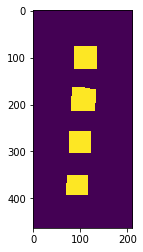

In [40]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.4*dist_transform.max(),255,0)
plt.imshow(sure_fg)
plt.show()

(463, 211, 3)
(463, 211, 3)


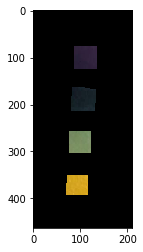

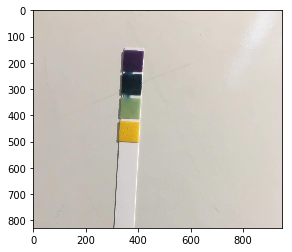

In [43]:
mask = cv2.cvtColor(sure_fg,cv2.COLOR_GRAY2RGB)
img_masked = cropped_img.copy()
img_masked[mask==0] = 0
plt.imshow(cv2.cvtColor(img_masked, cv2.COLOR_BGR2RGB))
plt.show()
show_color_im(img)
plt.show()